### Q1

c:\dev\miniconda\envs\faiac\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


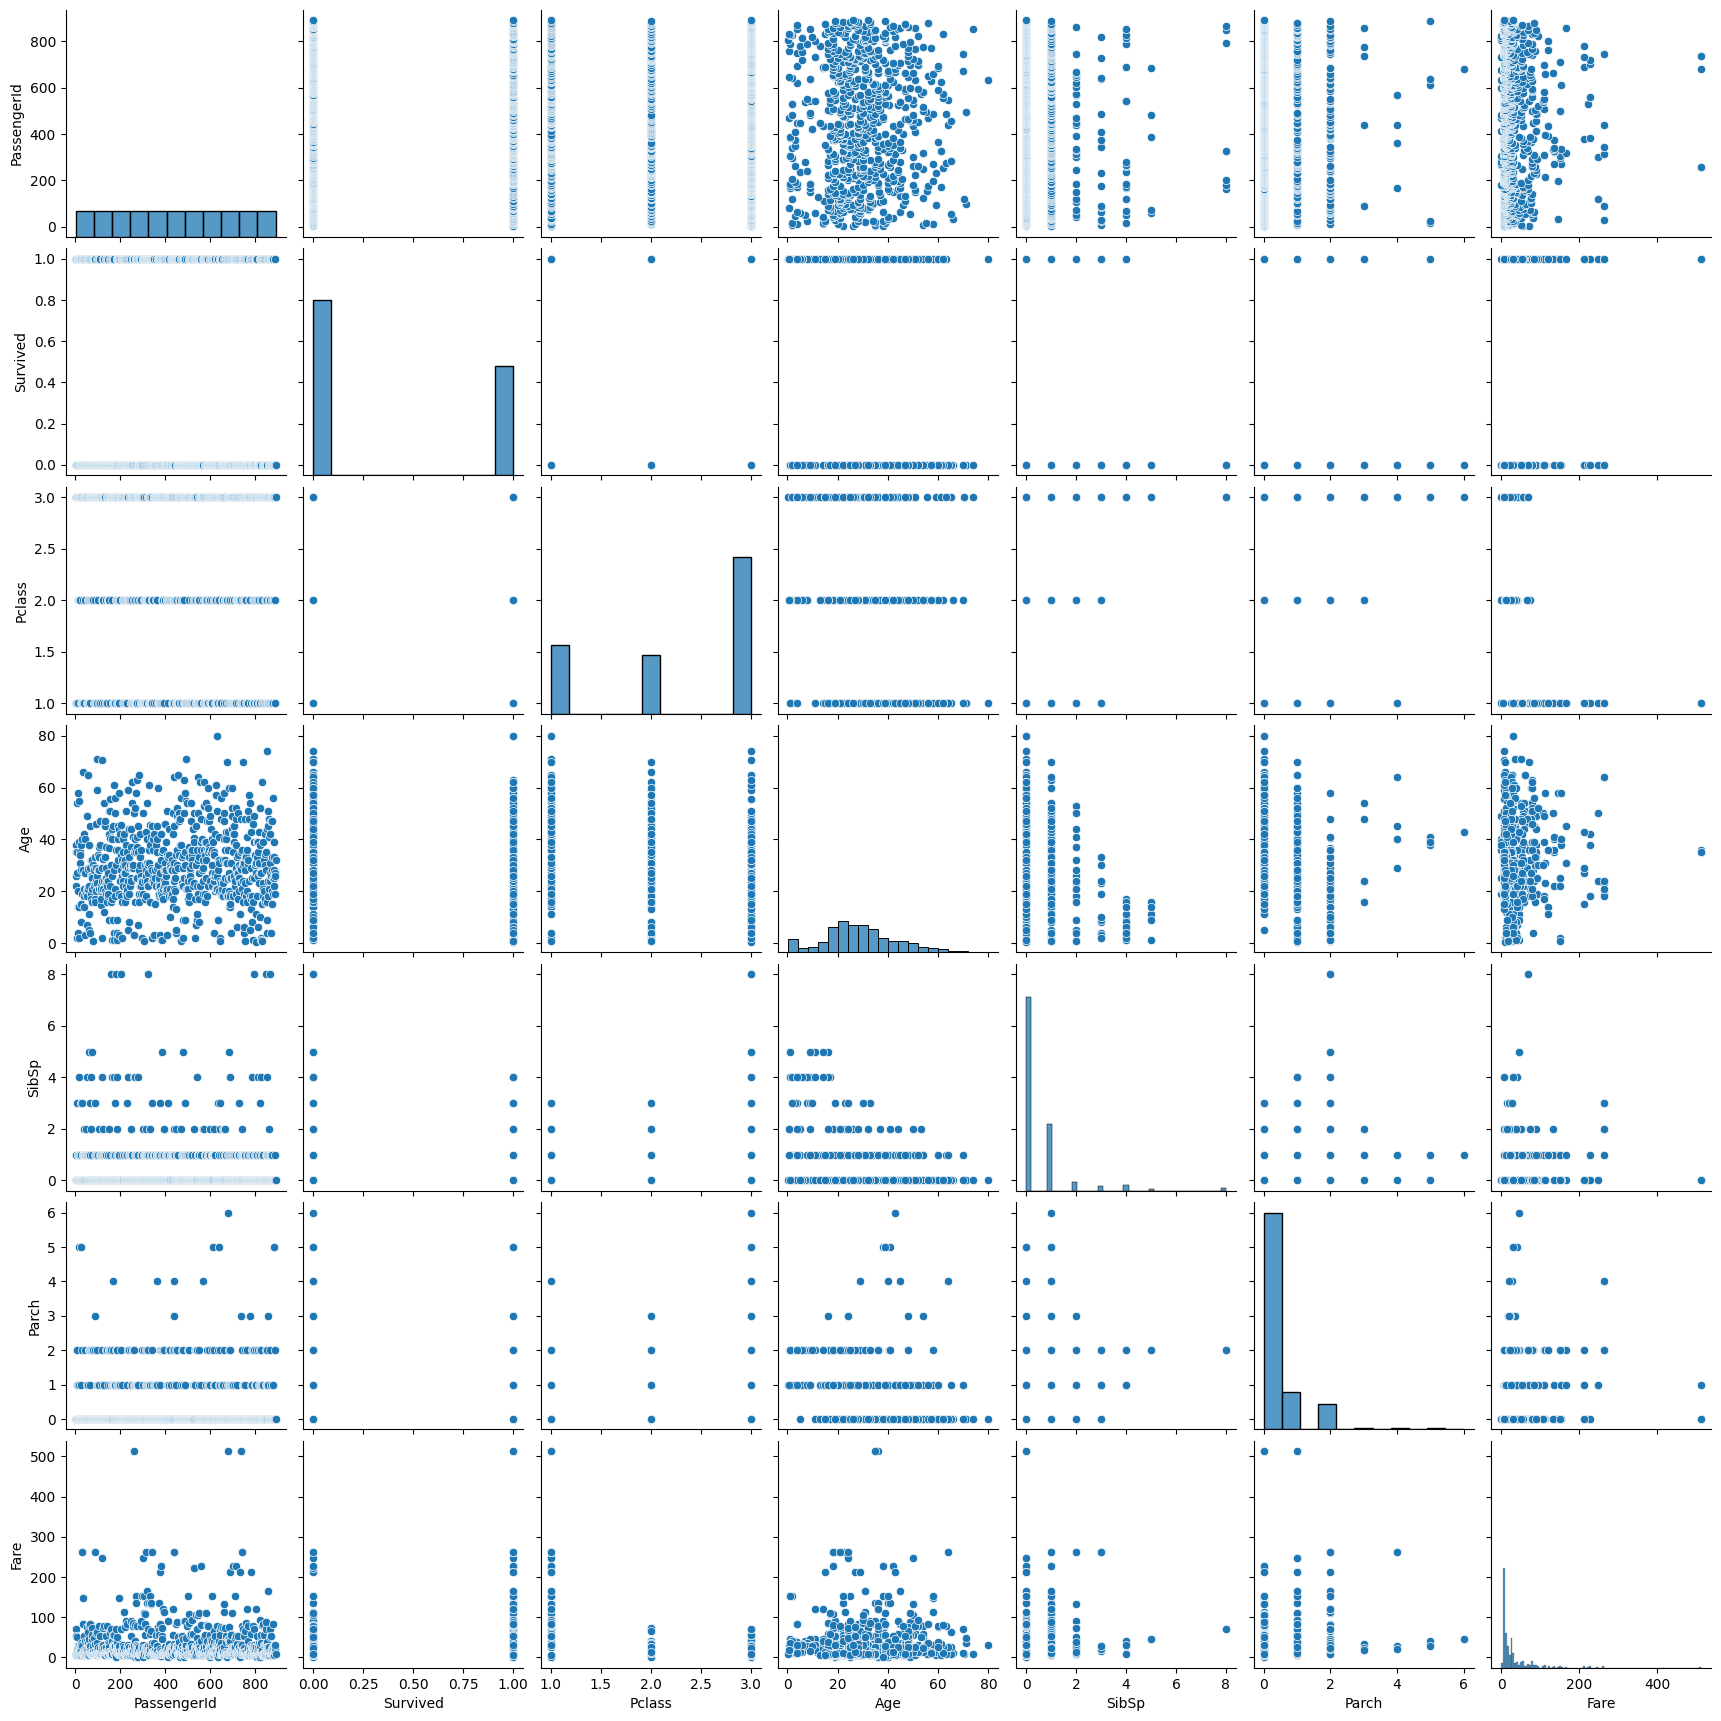

In [1]:
import kagglehub
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("yasserh/titanic-dataset")
path = f"{path}/Titanic-Dataset.csv"
data = pd.read_csv(path)

sns.pairplot(data)
plt.show()

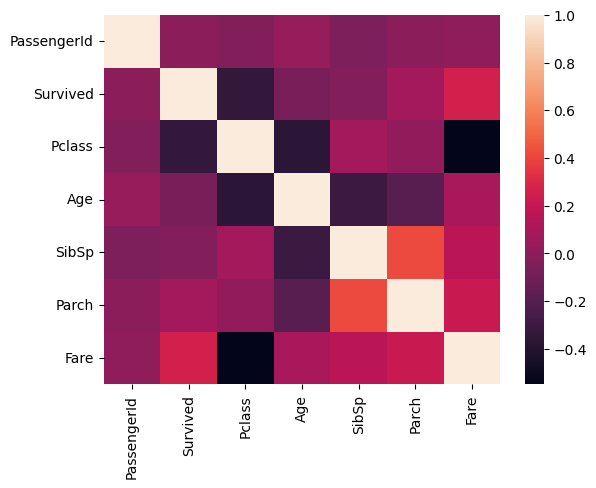

In [2]:
sns.heatmap(data.select_dtypes(['number']).corr())
plt.show()

In [3]:
corr = data.select_dtypes(['number']).corr()

vars = []
for col1 in corr:
    for col2 in corr:
        if corr[col1][col2] == corr.max().max():
            vars.append((col1, col2, corr[col1][col2]))
        elif corr[col1][col2] == corr.min().min():
            vars.append((col1, col2, corr[col1][col2]))

vars

[('PassengerId', 'PassengerId', 1.0),
 ('Survived', 'Survived', 1.0),
 ('Pclass', 'Pclass', 1.0),
 ('Pclass', 'Fare', -0.5494996199439076),
 ('Age', 'Age', 1.0),
 ('SibSp', 'SibSp', 1.0),
 ('Parch', 'Parch', 1.0),
 ('Fare', 'Pclass', -0.5494996199439076),
 ('Fare', 'Fare', 1.0)]

### Q2

In [4]:
import kagglehub
import os

path = kagglehub.dataset_download("shivamb/netflix-shows")
data = pd.read_csv(f'{path}/{os.listdir(path)[0]}')

Countries producing most content

In [5]:
data['country'].value_counts().sort_values(ascending=False)

country
United States                                           2818
India                                                    972
United Kingdom                                           419
Japan                                                    245
South Korea                                              199
                                                        ... 
Ireland, United Kingdom, Greece, France, Netherlands       1
France, Canada, Italy, United States, China                1
United States, Venezuela                                   1
United Kingdom, Canada, Japan                              1
United Arab Emirates, Jordan                               1
Name: count, Length: 748, dtype: int64

Trend of releases over years

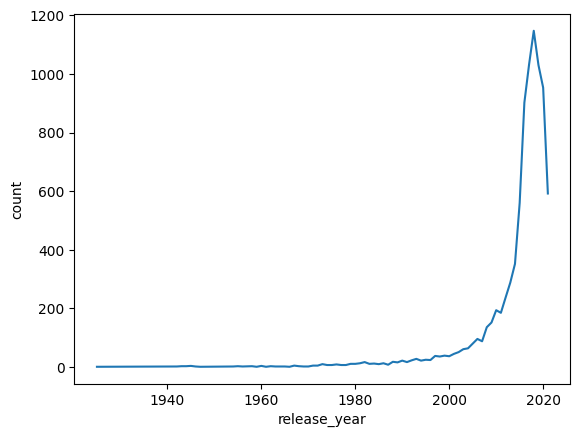

In [6]:
sns.lineplot(data['release_year'].value_counts())
plt.show()

<!-- Most common genres -->

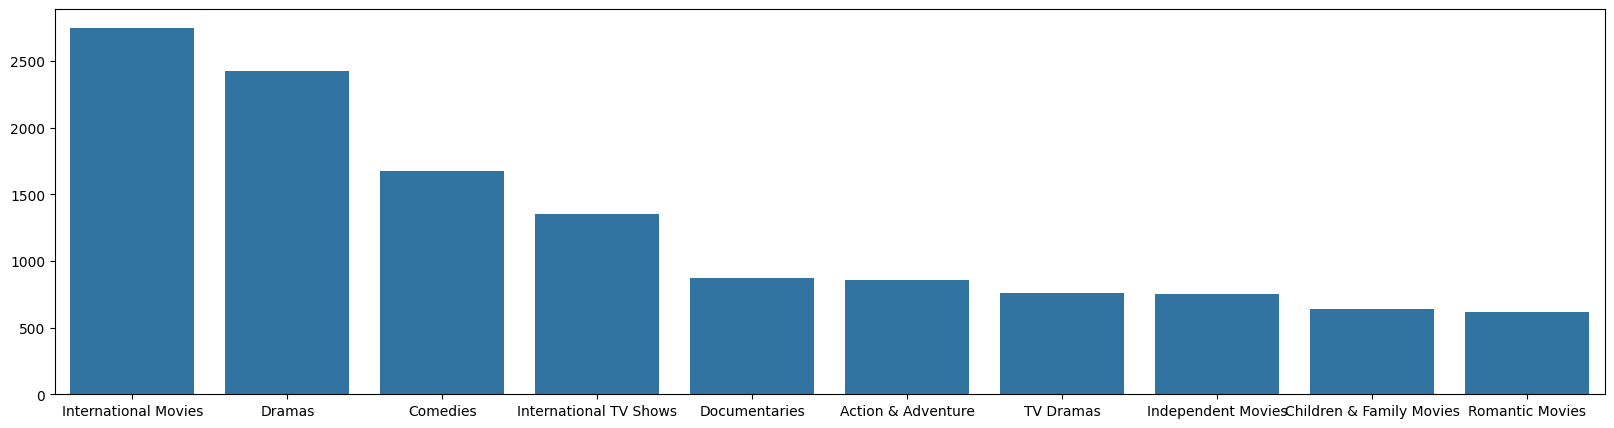

In [7]:
counts = {}
for val in data['listed_in']:
    for v in val.split(','):
        v = v.strip()
        counts[v] = counts.get(v, 0) + 1

sorted_counts = sorted(counts, key=lambda k: counts[k], reverse=True)

top = 10
sorted_counts = sorted_counts[:top]

f = plt.figure(figsize=(20,5))
sns.barplot(x=sorted_counts, y=[counts[k] for k in sorted_counts], figure=f)
plt.show()

Rating across genres

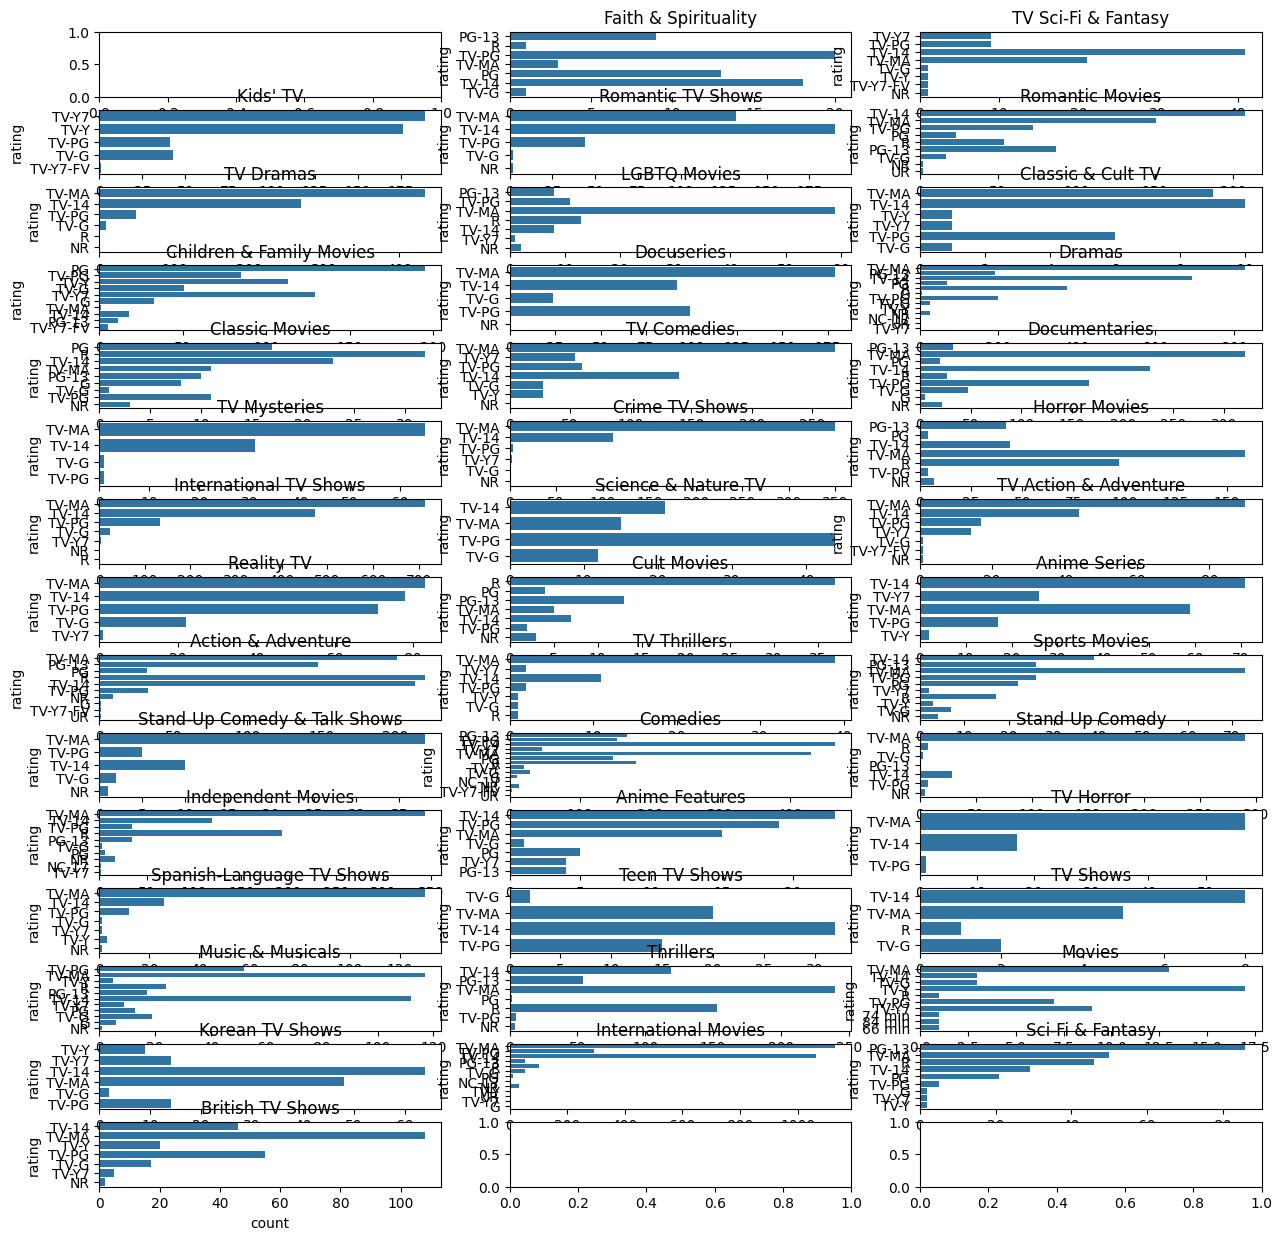

In [43]:
all_genres = set()
all_ratings = set()
for i in data.index:
    row = data.iloc[i]
    
    genres = row['listed_in']
    genres = genres.split(',')
    for genre in genres:
        all_genres.add(genre.strip())
    
    rating = row['rating']
    all_ratings.add(rating)


new_df = {'genre': [], 'rating': []}
for i in data.index:
    row = data.iloc[i]
    rating = row['rating']
    genres = row['listed_in']
    
    for genre in genres.split(','):
        genre = genre.strip()
        new_df['genre'].append(genre)
        new_df['rating'].append(rating)


new_df = pd.DataFrame(new_df)

f, ax = plt.subplots(len(all_genres) // 3 + 1, 3, figsize=(15, 15))
ax = ax.ravel()
for i, genre in enumerate(all_genres, 1):
    ratings = new_df[new_df['genre'] == genre]['rating']
    ax[i].set_title(genre)
    sns.countplot(new_df[new_df['genre'] == genre]['rating'], ax=ax[i])

plt.show()

### Q3

In [44]:
path = kagglehub.dataset_download("anthonypino/melbourne-housing-market")
path = f"{path}/{os.listdir(path)[0]}"

data = pd.read_csv(path)

100%|██████████| 2.28M/2.28M [00:01<00:00, 1.53MB/s]

Extracting files...


In [46]:
data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council


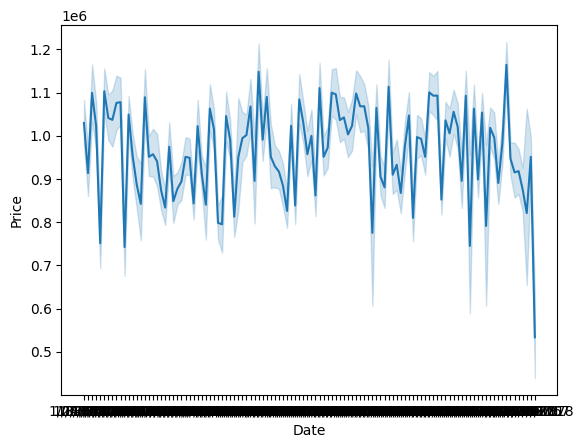

In [49]:
sns.lineplot(data, x='Date', y='Price')
plt.show()

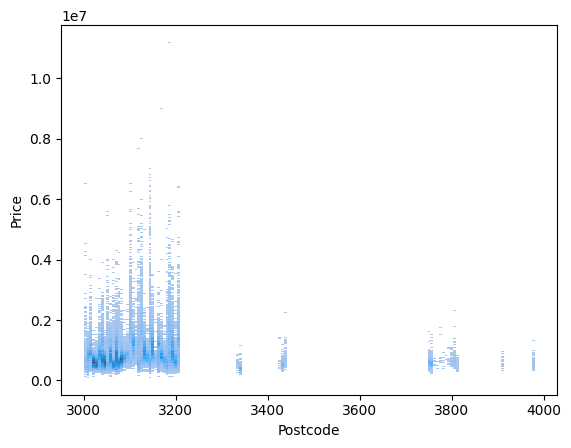

In [53]:
sns.histplot(data, x='Postcode', y='Price')
plt.show()

In [58]:
data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council


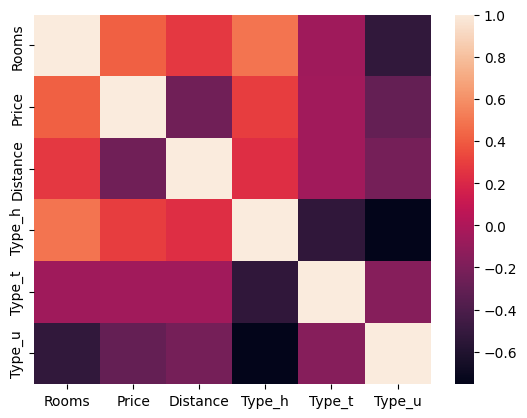

In [59]:
sns.heatmap(pd.get_dummies(data[['Rooms', 'Price', 'Type', 'Distance']]).corr())
plt.show()

### Q4

In [70]:
data = sns.load_dataset('taxis')

data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [71]:
data.shape

(6433, 14)

In [74]:
data.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


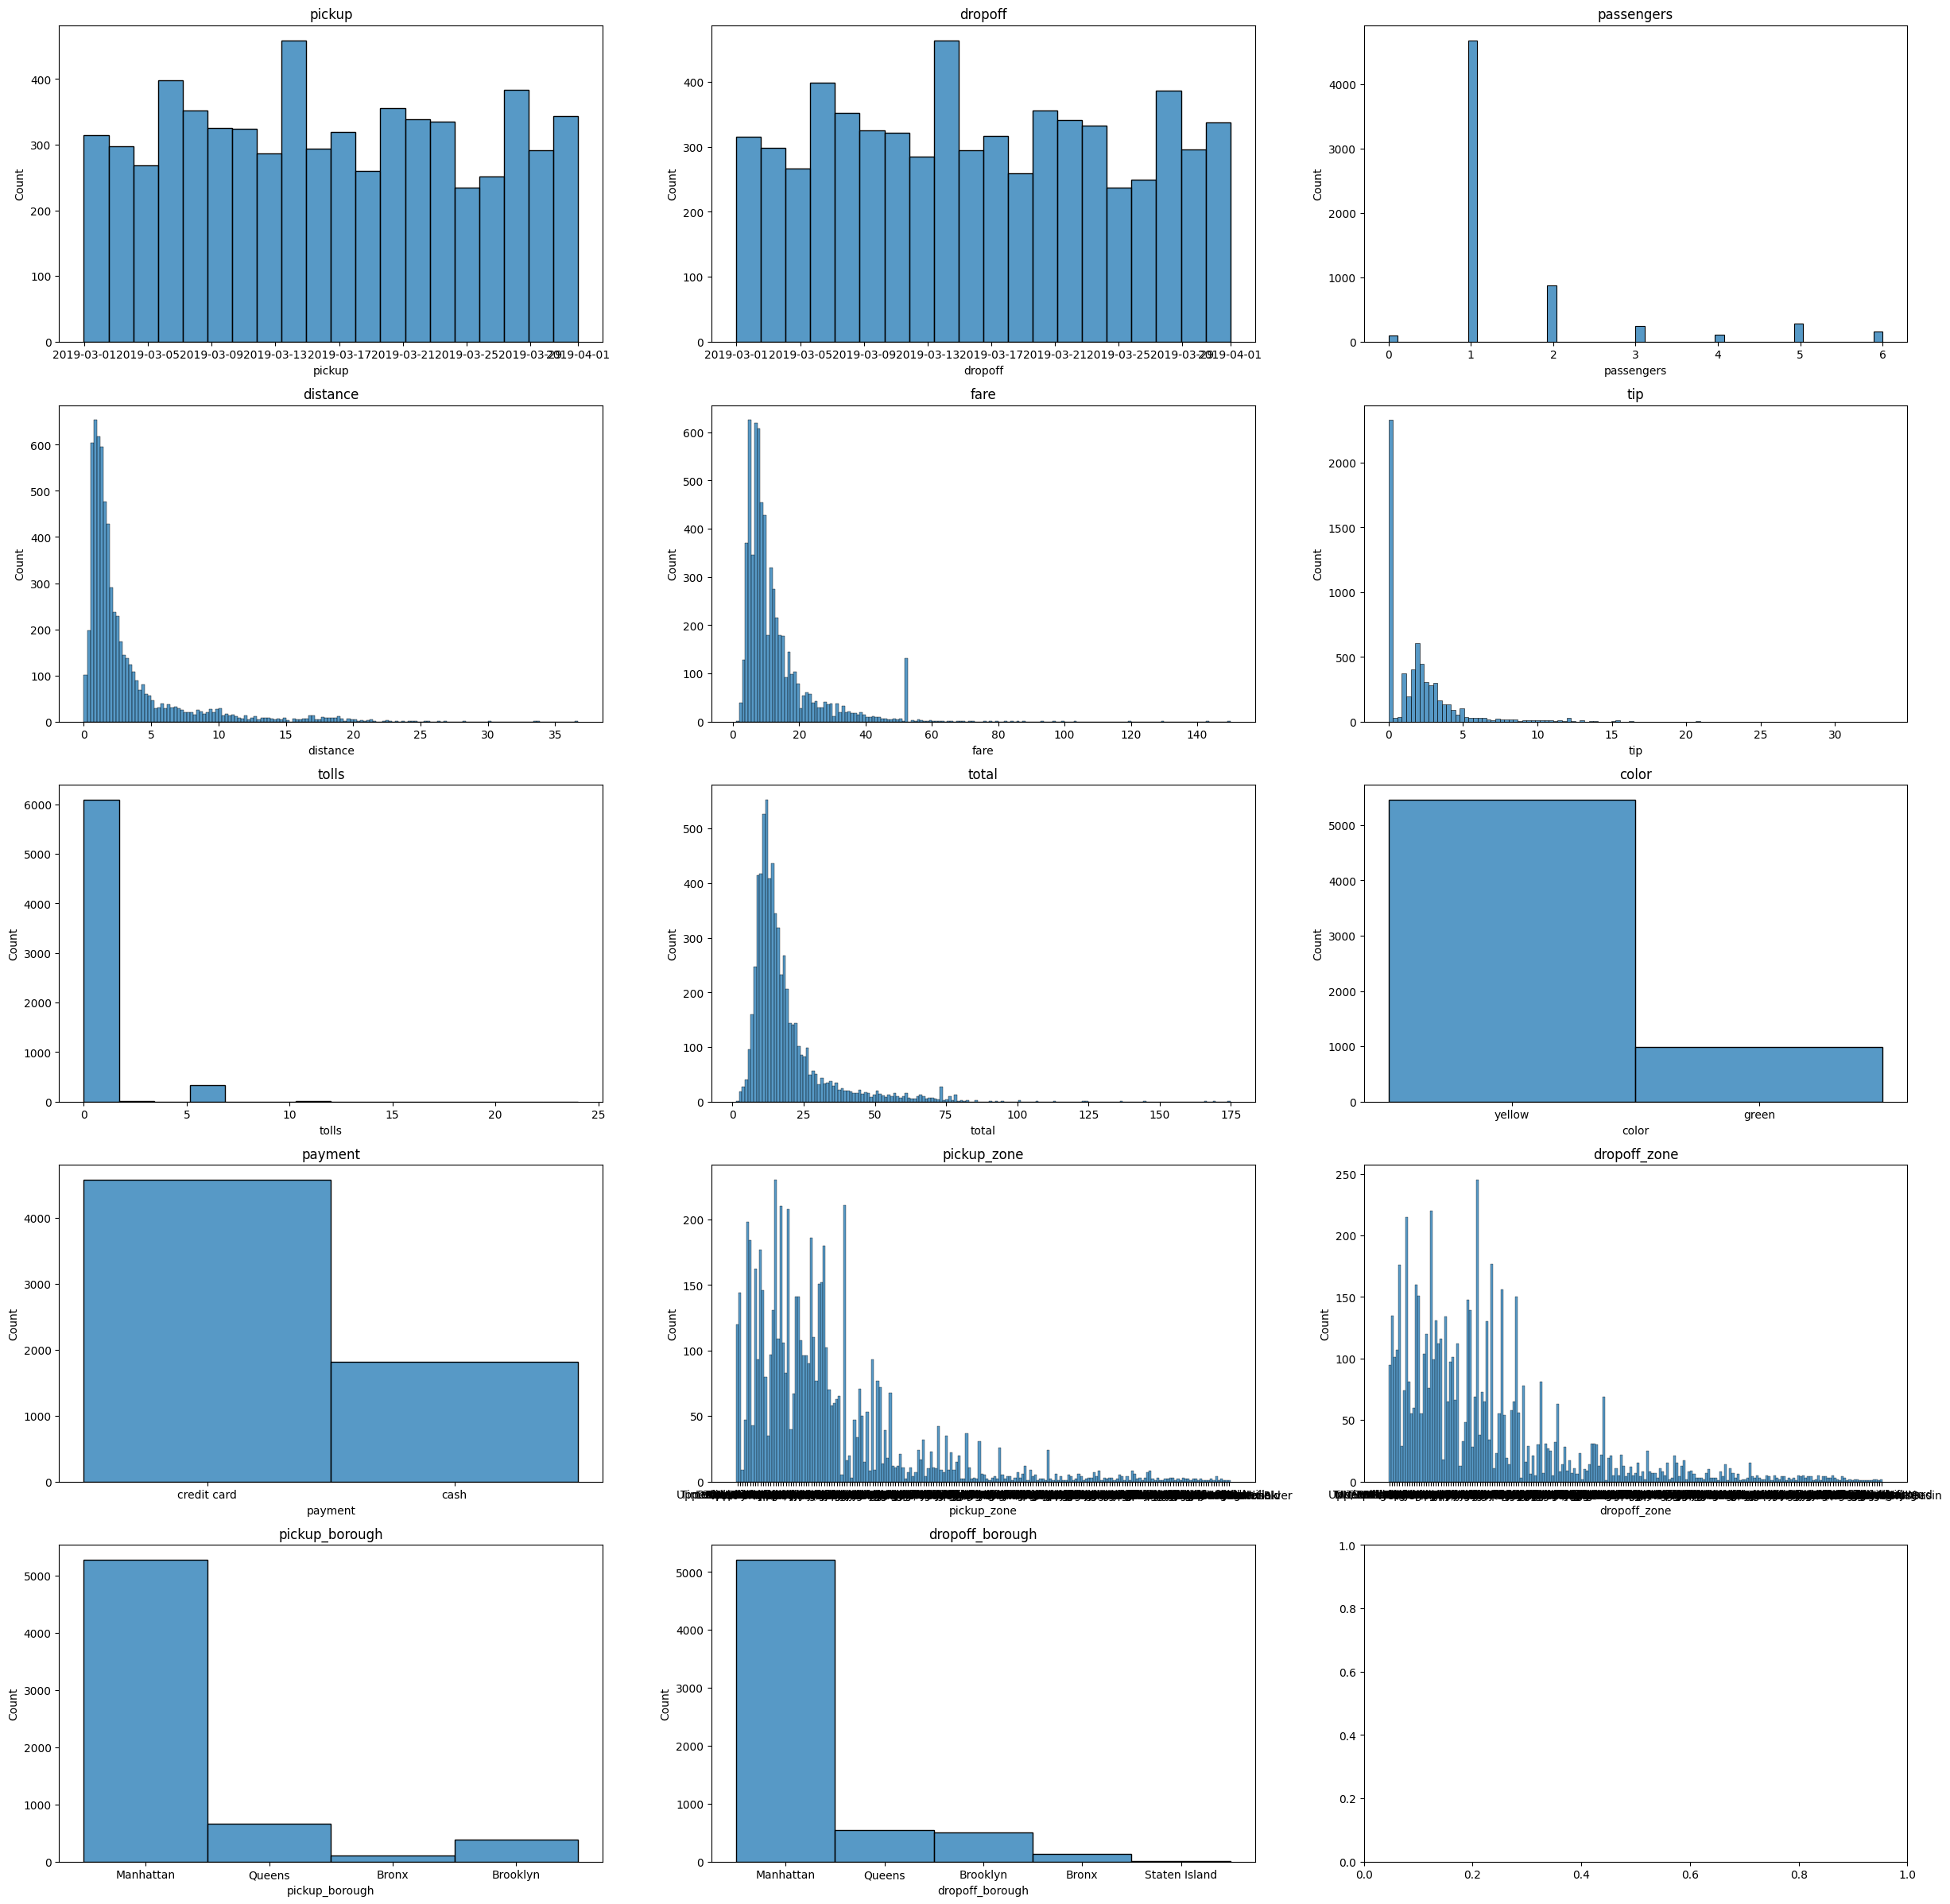

In [83]:
f, ax = plt.subplots(len(data.columns) // 3 + 1, 3, figsize=(30,30))
ax = ax.ravel()
for i in range(len(data.columns)):
    sns.histplot(data, x=data.columns[i], ax=ax[i])
    ax[i].set_title(data.columns[i])
plt.show()

#### Insights:
- Mostly single passengers
- Distance, fares, tips and totals are not normally distributed (highly skewed)
- Most pay with credit cards
- Manhattan is most important (has largest number of pickups and dropoffs)

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')


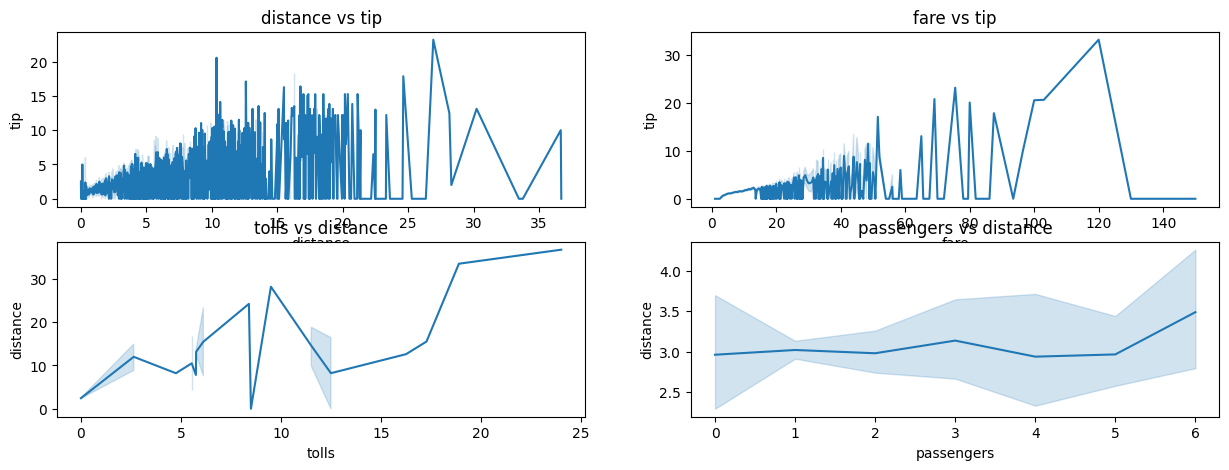

In [90]:
print(data.columns)

f = plt.figure(figsize=(15,5))
for i, (x, y) in enumerate(zip(['distance', 'fare', 'tolls', 'passengers'], ['tip', 'tip', 'distance', 'distance']), 1):
    ax = f.add_subplot(2,2,i)
    sns.lineplot(data, x=x, y=y, ax=ax)
    ax.set_title(f"{x} vs {y}")
plt.show()

#### Insights:
- More distance = more tip, generally
- Higher fare = higher tip, unless fare is too high
- More distance = more tolls
- More passengers = more distance

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')


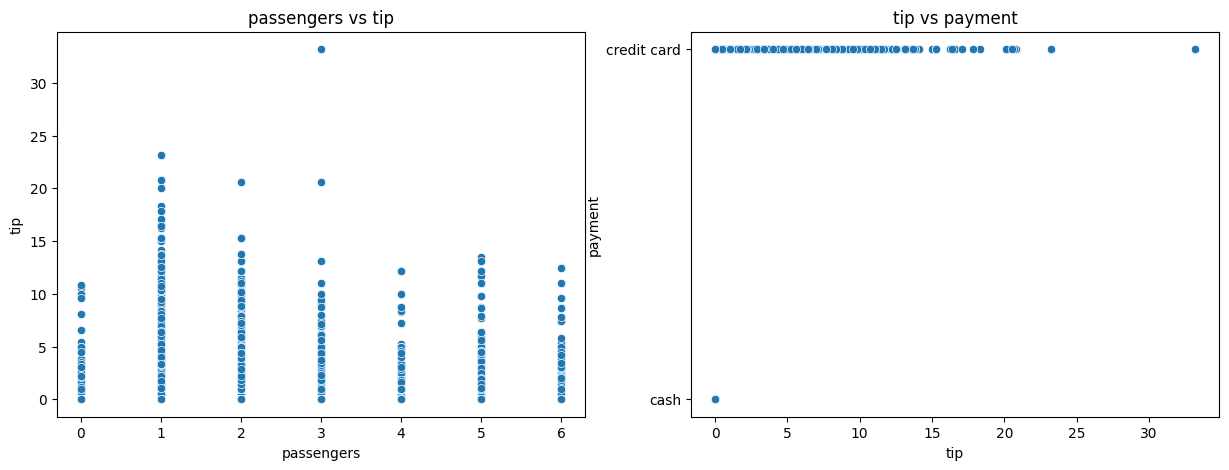

In [94]:
print(data.columns)

f = plt.figure(figsize=(15,5))
for i, (x, y) in enumerate(zip(['passengers', 'tip'], ['tip', 'payment']), 1):
    ax = f.add_subplot(1,2,i)
    sns.scatterplot(data, x=x, y=y, ax=ax)
    ax.set_title(f"{x} vs {y}")
plt.show()

#### Insights:
- Tip doesn't seem to depend much on number of passengers
- Most people who tipped used a credit card, and people with credit card tipped higher

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')


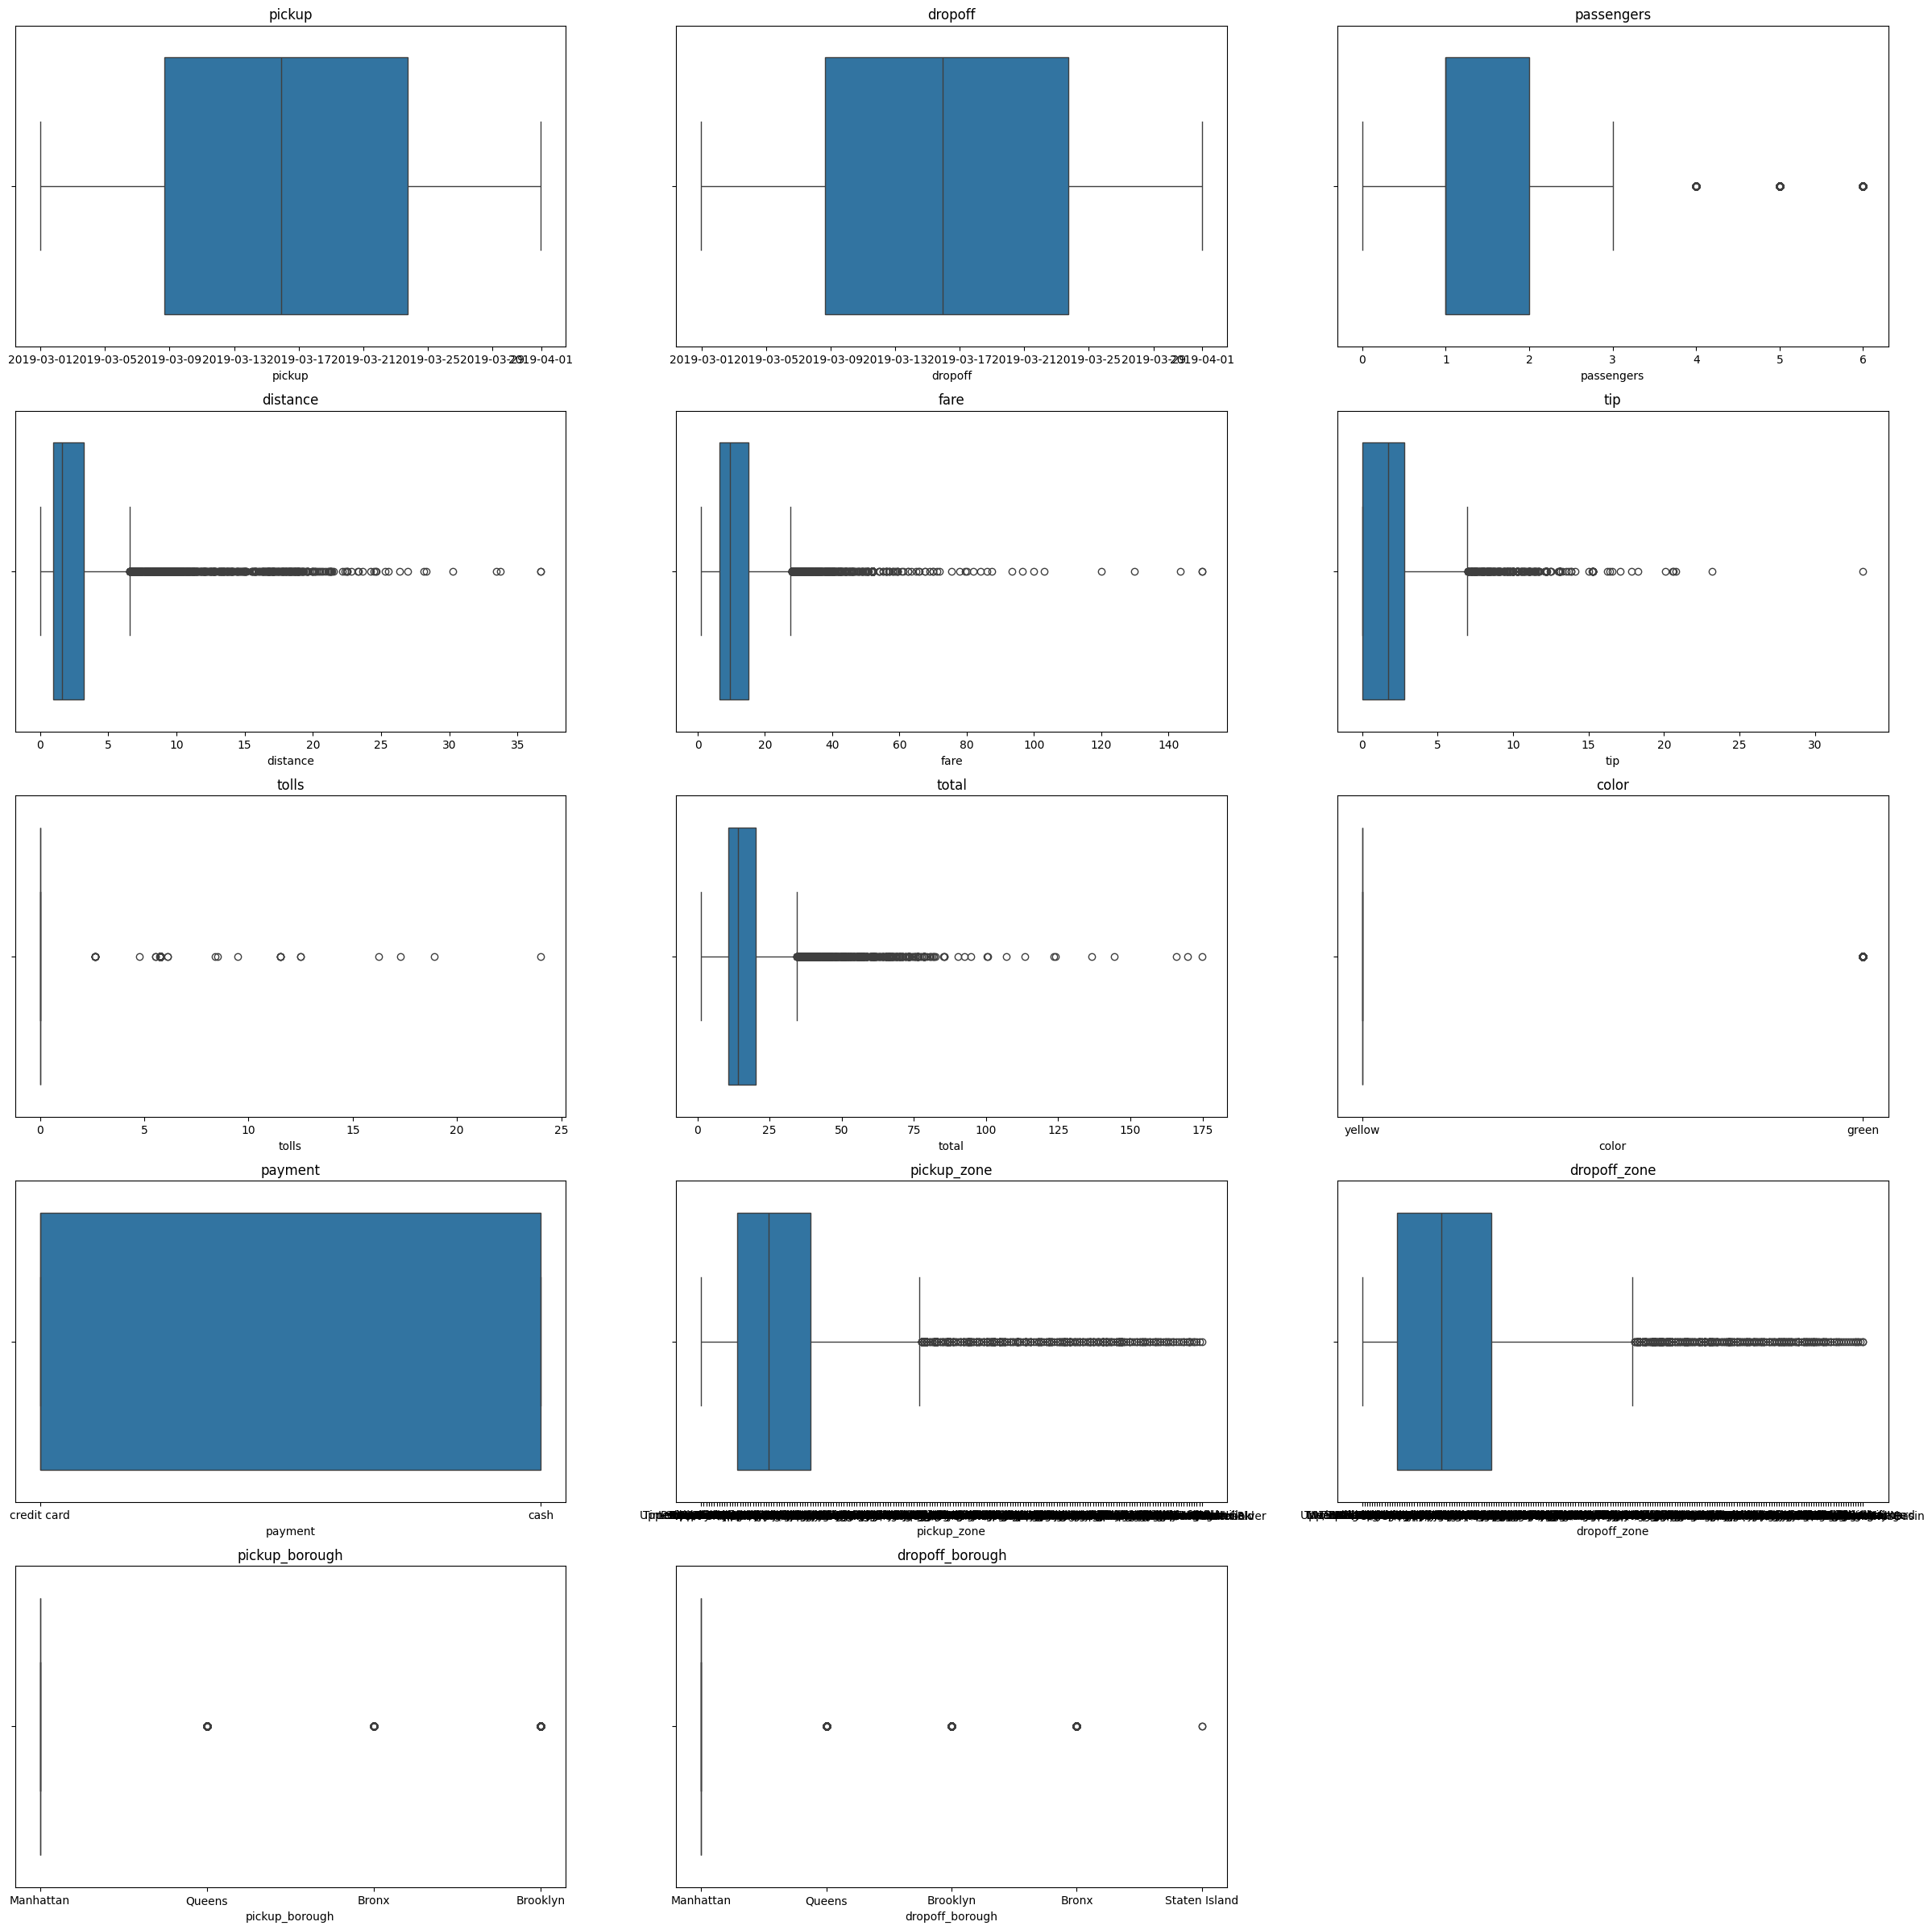

In [97]:
print(data.columns)

f = plt.figure(figsize=(30,30))
for i, x in enumerate(data.columns, 1):
    ax = f.add_subplot(len(data.columns) // 3 + 1, 3,i)
    sns.boxplot(data, x=x)
    ax.set_title(f"{x}")
plt.show()

#### Insights:
- Most passengers are 1-2
- Many people travelled short distances, but there are many outliers also (skewed)
- Same for fare, tip, and total
- Manhattan dominates plots

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')


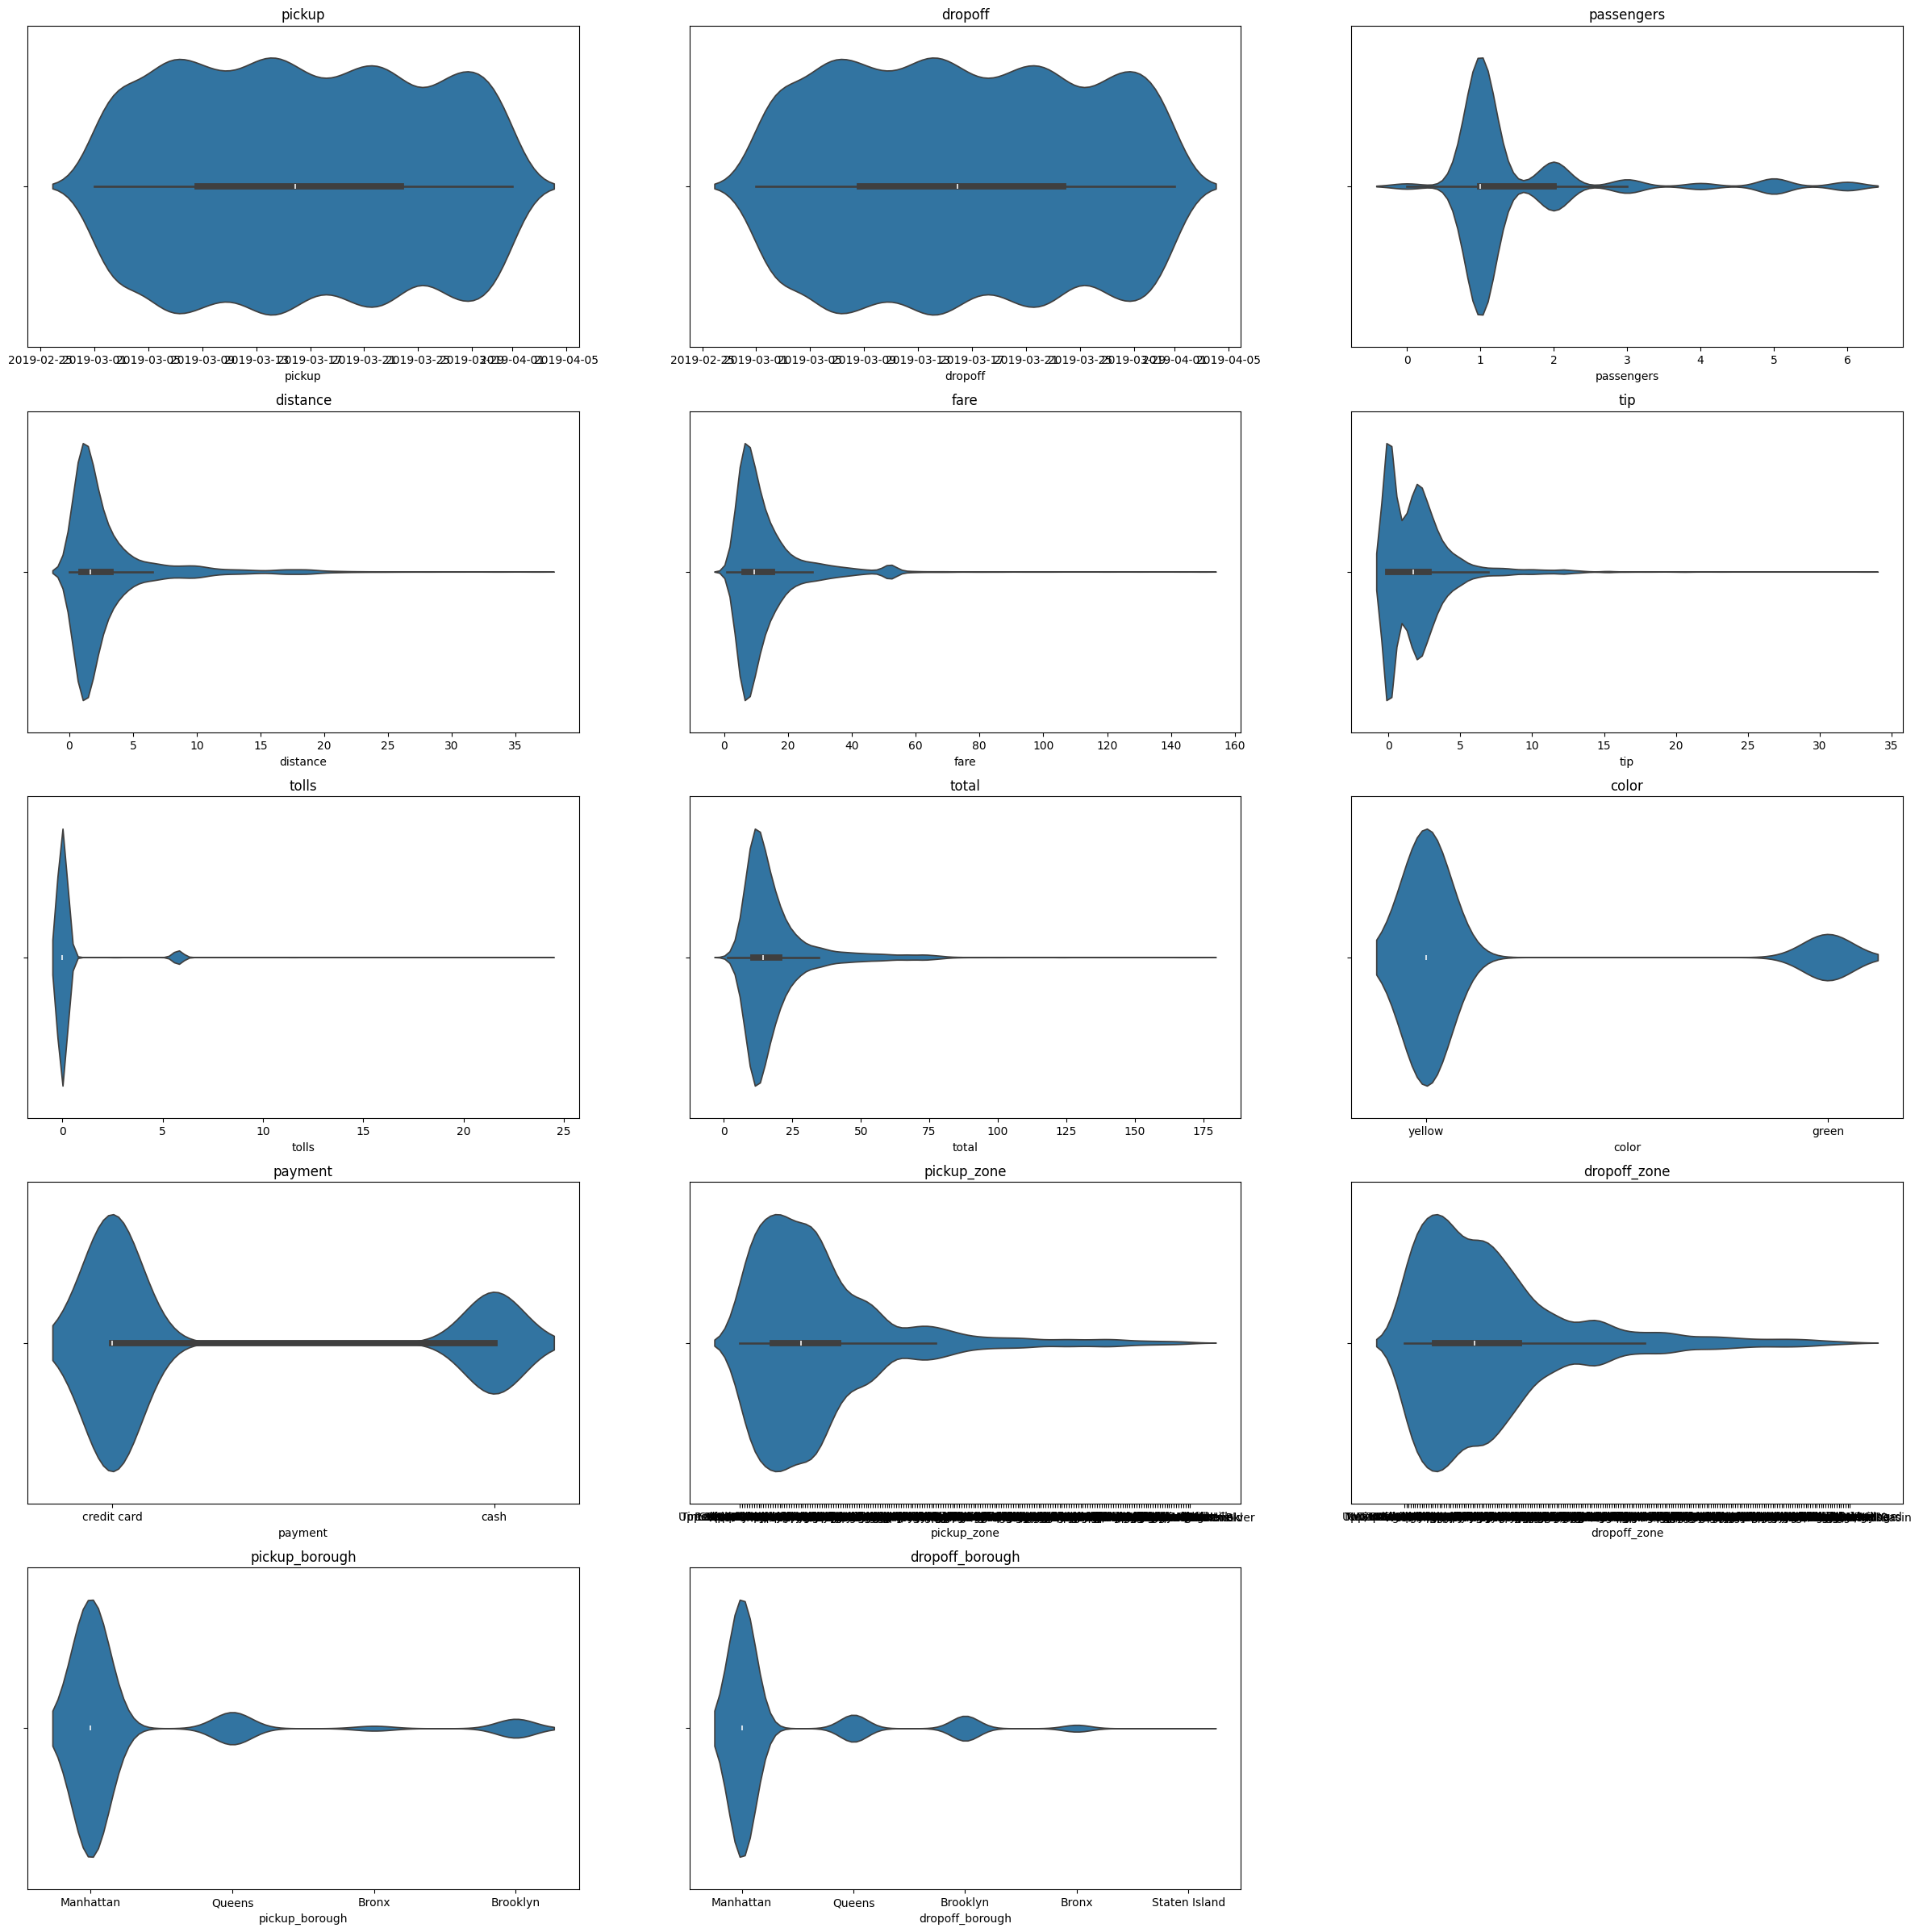

In [98]:
print(data.columns)

f = plt.figure(figsize=(30,30))
for i, x in enumerate(data.columns, 1):
    ax = f.add_subplot(len(data.columns) // 3 + 1, 3,i)
    sns.violinplot(data, x=x)
    ax.set_title(f"{x}")
plt.show()

#### Insights:
- Pickup and dropoff dates are distributed uniformally
- Similar insights as above

In [101]:
data.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [122]:
missing_data_cols = data.isna().columns
# print(missing_data_cols)

for col in missing_data_cols:
    print(col, data[col].dtype)

use_mean = ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']
data_imputed = data.fillna({col:data[col].mean() for col in use_mean})

use_mode = ['pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough', 'passengers', 'payment', 'color']
data_imputed = data_imputed.fillna({col:data_imputed[col].mode()[0] for col in use_mode})


data_imputed.isna().sum()

pickup datetime64[ns]
dropoff datetime64[ns]
passengers int64
distance float64
fare float64
tip float64
tolls float64
total float64
color object
payment object
pickup_zone object
dropoff_zone object
pickup_borough object
dropoff_borough object


pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [ ]:
numeric = data_imputed.select_dtypes(['number'])

q1 = numeric.quantile(q=0.25)
q3 = numeric.quantile(q=0.75)
iqr = q3 - q1
tol = 1.5*iqr

# print(iqr, iqr + tol, iqr - tol)

mask = (numeric > q3+tol) | (numeric < q1-tol)
# mask

data_no_outlier = data_imputed.copy()
data_no_outlier[mask] = None
data_no_outlier = data_no_outlier.dropna()
data_no_outlier

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1.0,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1.0,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1.0,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1.0,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1.0,3.65,13.0,2.00,0.0,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6426,2019-03-28 08:04:47,2019-03-28 08:07:46,1.0,0.71,4.5,0.50,0.0,5.80,green,credit card,Central Park,Upper West Side North,Manhattan,Manhattan
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1.0,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1.0,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1.0,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [141]:
data_cat_to_onehot = pd.get_dummies(data_no_outlier)
data_cat_to_onehot.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color_green,color_yellow,...,dropoff_zone_Yorkville East,dropoff_zone_Yorkville West,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1.0,1.60,7.0,2.15,0.0,12.95,False,True,...,False,False,False,False,True,False,False,False,True,False
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1.0,0.79,5.0,0.00,0.0,9.30,False,True,...,False,False,False,False,True,False,False,False,True,False
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1.0,1.37,7.5,2.36,0.0,14.16,False,True,...,False,False,False,False,True,False,False,False,True,False


In [144]:
import numpy as np

data_tform = data_cat_to_onehot.copy()
do_log_on = ['distance', 'fare', 'tip', 'total']
data_tform[do_log_on] = data_tform[do_log_on].map(lambda x: np.log(x + 1))

scale_these = data_tform.select_dtypes(['number'])
scale_these = scale_these - scale_these.min()
scale_these = scale_these / scale_these.max()

data_tform[scale_these.columns] = scale_these

data_tform.head(3)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color_green,color_yellow,...,dropoff_zone_Yorkville East,dropoff_zone_Yorkville West,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens
0,2019-03-23 20:21:09,2019-03-23 20:27:24,0.5,0.508395,0.578130,0.623402,NaN,0.758684,False,True,...,False,False,False,False,True,False,False,False,True,False
1,2019-03-04 16:11:55,2019-03-04 16:19:00,0.5,0.309777,0.458157,0.000000,NaN,0.631013,False,True,...,False,False,False,False,True,False,False,False,True,False
2,2019-03-27 17:53:01,2019-03-27 18:00:25,0.5,0.459115,0.603412,0.658467,NaN,0.793694,False,True,...,False,False,False,False,True,False,False,False,True,False


In [145]:
data.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


#### Inconsistencies / Unrealistic
- 0 passengers
- 0 distance

In [ ]:
data_final = data[data['passengers'] != 0]
data_final = data_final[data_final['distance'] != 0]


missing_data_cols = data_final.isna().columns

data_final = data_final.fillna({col:data_final[col].mean() for col in ['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']})
data_final = data_final.fillna({col:data_final[col].mode()[0] for col in ['pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough', 'passengers', 'payment', 'color']})
print(data_final.isna().sum())


numeric = data_final.select_dtypes(['number'])

q1 = numeric.quantile(q=0.25)
q3 = numeric.quantile(q=0.75)
iqr = q3 - q1
tol = 1.5*iqr

mask = (numeric > q3+tol) | (numeric < q1-tol)
data_final[mask] = None
data_final = data_final.dropna()


data_final = pd.get_dummies(data_final)


do_log_on = ['distance', 'fare', 'tip', 'total']
data_final[do_log_on] = data_final[do_log_on].map(lambda x: np.log(x + 1))

scale_these = data_final.select_dtypes(['number'])
scale_these = scale_these - scale_these.min()
scale_these = scale_these / scale_these.max()

data_final[scale_these.columns] = scale_these

# don't use date columns
data_final = data_final.drop(['pickup', 'dropoff'], axis=1)

data_final.head(3)
print(data_final.describe())


pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64
        passengers     distance         fare          tip  tolls        total
count  4454.000000  4454.000000  4454.000000  4454.000000    0.0  4454.000000
mean      0.159407     0.472701     0.633727     0.388974    NaN     0.750614
std       0.366097     0.190058     0.151980     0.320020    NaN     0.128913
min       0.000000     0.000000     0.000000     0.000000    NaN     0.000000
25%       0.000000     0.333286     0.522443     0.000000    NaN     0.670012
50%       0.000000     0.453656     0.627249     0.497835    NaN     0.754134
75%       0.000000     0.596471     0.747222     0.656847    NaN     0.848662
max       1.000000     1.000000     1.000000     1.000000    NaN     

In [162]:
data_final.columns

Index(['passengers', 'distance', 'fare', 'tip', 'tolls', 'total',
       'color_green', 'color_yellow', 'payment_cash', 'payment_credit card',
       ...
       'dropoff_zone_Yorkville East', 'dropoff_zone_Yorkville West',
       'pickup_borough_Bronx', 'pickup_borough_Brooklyn',
       'pickup_borough_Manhattan', 'pickup_borough_Queens',
       'dropoff_borough_Bronx', 'dropoff_borough_Brooklyn',
       'dropoff_borough_Manhattan', 'dropoff_borough_Queens'],
      dtype='object', length=365)

In [169]:
# Predict fare

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(data_final.drop('fare', axis=1, inplace=False), data_final['fare'])

RandomForestRegressor()

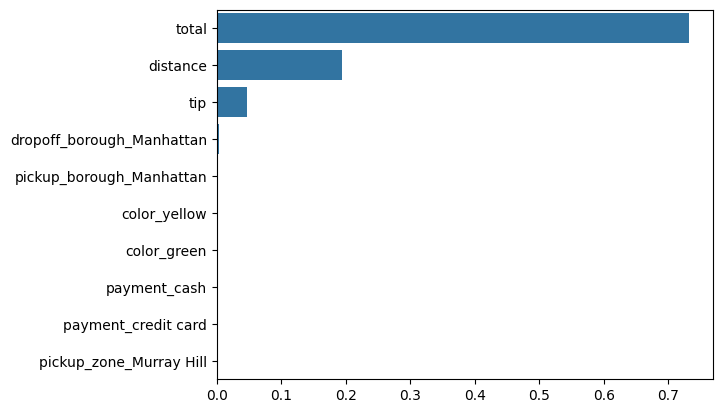

In [177]:
imps = sorted(list(zip(rf.feature_importances_, rf.feature_names_in_)), key=lambda imp_name: imp_name[0], reverse=True)

imp = []
names = []
for elem in imps:
    imp.append(elem[0])
    names.append(elem[1])

top = 10

sns.barplot(x=imp[:top], y=names[:top])
plt.show()

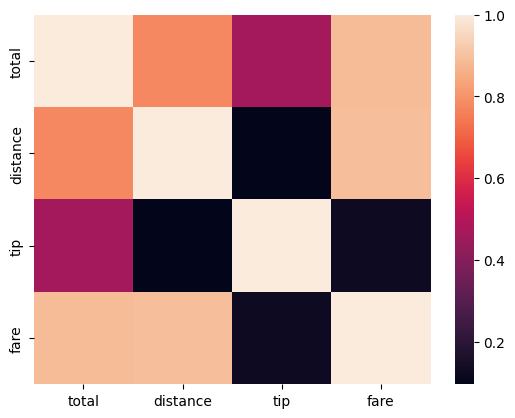

In [179]:
relevant = data_final[['total', 'distance', 'tip', 'fare']]

sns.heatmap(relevant.corr())
plt.show()

### Q5

In [180]:
path = kagglehub.dataset_download("yasserh/titanic-dataset")
path = f"{path}/{os.listdir(path)[0]}"

data = pd.read_csv(path)

In [181]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [183]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
data_processed = data.fillna(value={
    'Age': data['Age'].mean(),
    'Cabin': data['Cabin'].mode()[0],
    })
data_processed.dropna(inplace=True)
data_processed.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [191]:
numeric = data_processed.select_dtypes(['number'])

q1 = numeric.quantile(q=0.25)
q3 = numeric.quantile(q=0.75)
iqr = q3 - q1
tol = 1.5 * iqr

data_processed[(numeric > q3+tol) | (numeric < q1-tol)] = None
data_processed = data_processed.dropna()

<Figure size 640x480 with 0 Axes>

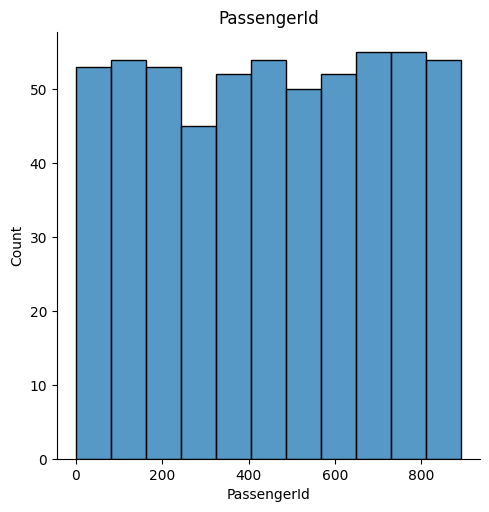

<Figure size 640x480 with 0 Axes>

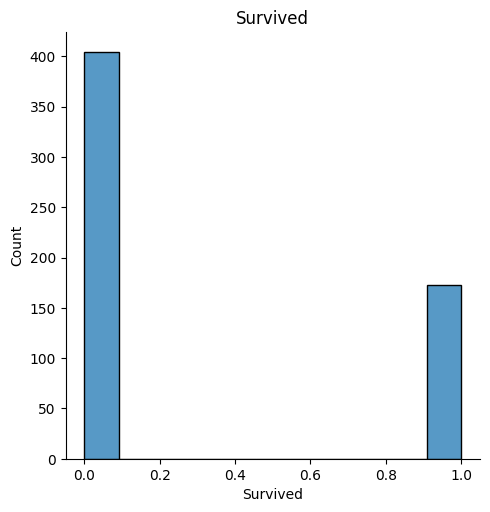

<Figure size 640x480 with 0 Axes>

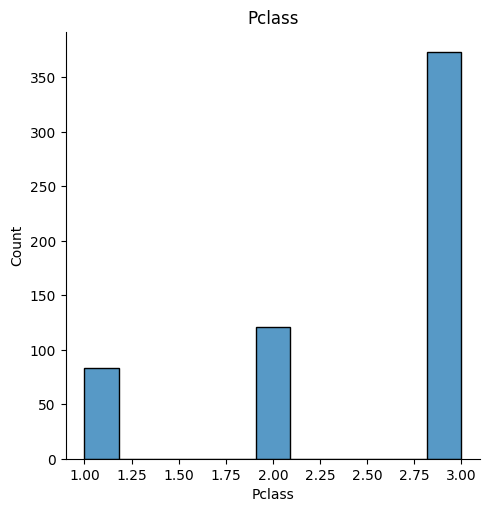

<Figure size 640x480 with 0 Axes>

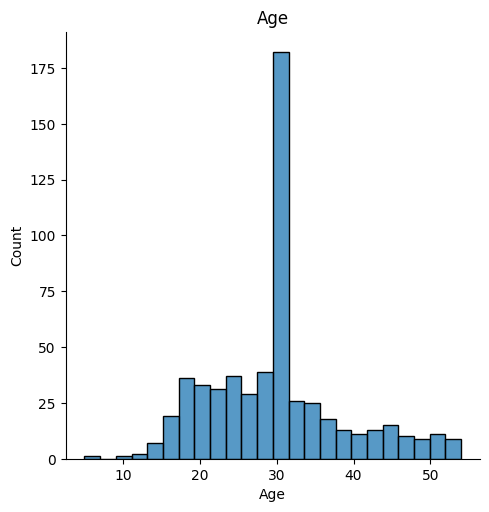

<Figure size 640x480 with 0 Axes>

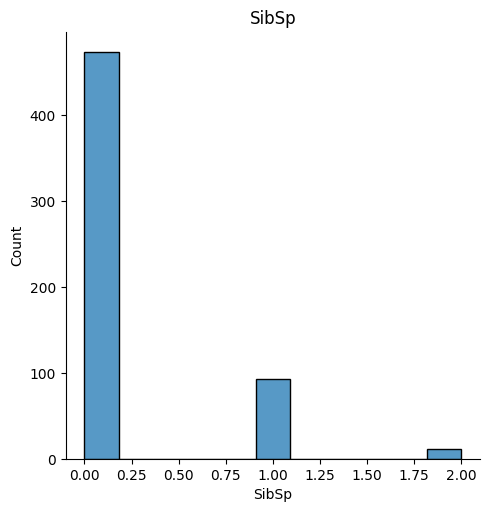

<Figure size 640x480 with 0 Axes>

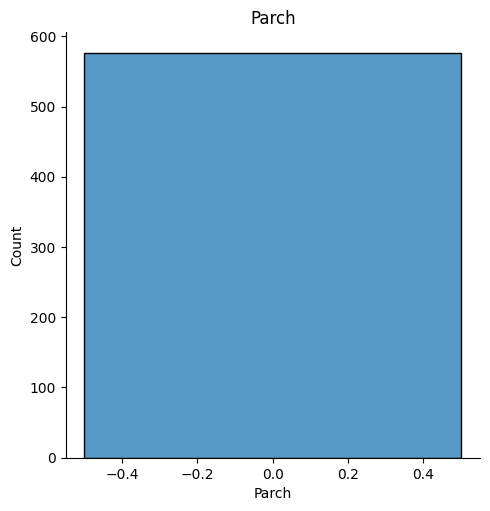

<Figure size 640x480 with 0 Axes>

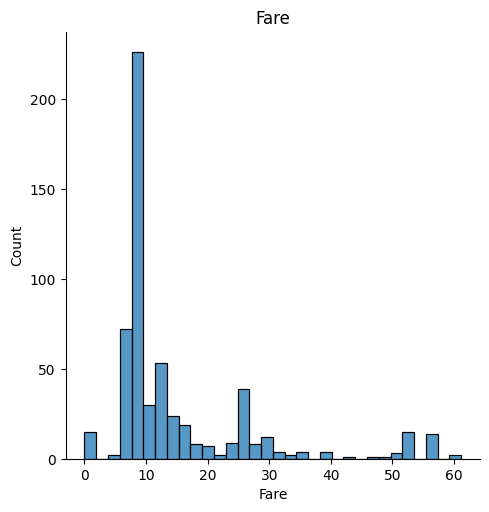

In [201]:
numeric = data_processed.select_dtypes(['number'])
for i in range(len(numeric.columns)):
    plt.figure()
    sns.displot(numeric[numeric.columns[i]])
    plt.title(numeric.columns[i])
plt.show()

In [207]:
print(data_processed['Age'].describe())

data_processed['AgeCategory'] = data_processed['Age'].map(lambda age: 'Child' if age < 18 else 'Adult' if age < 40 else 'Elder')
data_processed[data_processed['AgeCategory'] != 'Adult'].head(5)

count    577.000000
mean      29.742060
std        8.516997
min        5.000000
25%       24.000000
50%       29.699118
75%       32.500000
max       54.000000
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,Elder
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,B96 B98,C,Child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0.0,0.0,350406,7.8542,B96 B98,S,Child
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0.0,0.0,330923,8.0292,B96 B98,Q,Child
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0.0,0.0,PC 17601,27.7208,B96 B98,C,Elder


In [215]:
data_processed[['Fare', 'Pclass']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,36.091466
2,15.440047
3,10.050054
